In [74]:
import pandas as pd
import numpy as np

### Movies

In [75]:
movies = pd.read_csv("DataSets/movies.csv")
movie_title_keywords = pd.read_csv("DataSets/movie_title_keywords.csv")

df_movies = movies.merge(movie_title_keywords[['id', 'keyword', 'movieID']], 
                            how = 'inner',
                        left_on = 'movieId',
                        right_on = 'movieID').drop('movieID',axis=1)

df_movies.head()

,movieId,title,genres,id,keyword
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Toy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,Story
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,Toy Story
4,2,Jumanji (1995),Adventure|Children|Fantasy,4,Jumanji


### TMDB

In [76]:
tmdb_keywords = pd.read_csv("DataSets/tmdb_keywords.csv")

tmdb_overview_keywords = pd.read_csv("DataSets/tmdb_overview_keywords.csv",
                                    usecols = ['TMDB ID', 'keyword'])
tmdb_overview_keywords.rename(columns={'keyword':'overview_keyword'},inplace=True)

# tmdb_genres = pd.read_csv("DataSets/tmdb_genres.csv",
#                          usecols = ['genre', 'movieID'])
tmdb_attributes = pd.read_csv("DataSets/tmdb_attributes.csv",
                             usecols = [
                                 'budget', 'id', 'original_language', 
                                 'popularity',
                                 'release_date', 'revenue', 'runtime', 
                                 'tagline','vote_average', 'vote_count'])

df_tmdb = tmdb_keywords.merge(tmdb_overview_keywords, 
                         how = 'inner',
                        left_on = 'movieID',
                        right_on = 'TMDB ID')
# df_tmdb = df_tmdb.merge(tmdb_genres, 
#                             how = 'inner',
#                         on = 'movieID')
df_tmdb = df_tmdb.merge(tmdb_attributes, 
                        how = 'inner',
                        left_on = 'movieID',
                        right_on = 'id')

df_tmdb.head()

,Unnamed: 0,keyword,movieID,title,TMDB ID,overview_keyword,budget,id,original_language,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count
0,0,culture clash,19995,Avatar,19995,22nd century,237000000,19995,en,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800
1,0,culture clash,19995,Avatar,19995,paraplegic Marine,237000000,19995,en,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800
2,0,culture clash,19995,Avatar,19995,orders,237000000,19995,en,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800
3,0,culture clash,19995,Avatar,19995,moon Pandora,237000000,19995,en,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800
4,0,culture clash,19995,Avatar,19995,unique mission,237000000,19995,en,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800


### IMDB

In [77]:
imdb_genres = pd.read_csv("DataSets/imdb_genres.csv")
imdb_attributes = pd.read_csv("DataSets/imdb_attributes.csv")

df_imdb = imdb_genres.merge(imdb_attributes, 
                                 how = 'inner',
                              left_on ='id',
                                 right_on = 'tid')
df_imdb.drop(['genre','id','url'], axis = 1, inplace = True)
df_imdb.head(2)

,tid,title,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0012349,Der Vagabund und das Kind (1921),8.4,3240,1921,1,0
1,tt0012349,Der Vagabund und das Kind (1921),8.4,3240,1921,1,0


## Join DataSets

In [78]:
ratings = pd.read_csv("DataSets/ratings.csv")
links = pd.read_csv("DataSets/links.csv")

In [79]:
df = links.merge(df_movies[['movieId', 'title', 'id', 'keyword','genres']], 
            how = 'left',
           left_on = 'movieId',
           right_on = 'movieId')
df = df.merge(df_imdb[['tid','title','imdbRating','duration']], 
            how = 'inner',
           left_on = 'imdbId',
           right_on = 'tid')
df = df.merge(df_tmdb, 
            how = 'left',
           left_on = 'tmdbId',
           right_on = 'TMDB ID')

df.drop(['title','title_x','id_x','id_y','Unnamed: 0'],axis=1,inplace=True)
df.rename(columns={'title_y':'title'}, inplace=True)

df['keyword_x'] = df.apply(lambda x: x['keyword_y'] if x['keyword_x']=='' else x['keyword_x'], axis=1)
df.drop(['keyword_y'], axis=1, inplace=True)
df.rename(columns={'keyword_x':'keyword'},inplace=True)

print(len(df))
print('\n')
print("Movie Columns: " + str(df_movies.columns))
print("TMDB Columns: " + str(df_tmdb.columns))
print("Consolidated Columns: " + str(df.columns))
df.head()

3146085


Movie Columns: Index(['movieId', 'title', 'genres', 'id', 'keyword'], dtype='object')
TMDB Columns: Index(['Unnamed: 0', 'keyword', 'movieID', 'title', 'TMDB ID',
       'overview_keyword', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'tagline', 'vote_average',
       'vote_count'],
      dtype='object')
Consolidated Columns: Index(['imdbId', 'movieId', 'tmdbId', 'keyword', 'genres', 'tid', 'title',
       'imdbRating', 'duration', 'movieID', 'TMDB ID', 'overview_keyword',
       'budget', 'original_language', 'popularity', 'release_date', 'revenue',
       'runtime', 'tagline', 'vote_average', 'vote_count'],
      dtype='object')


,imdbId,movieId,tmdbId,keyword,genres,tid,title,imdbRating,duration,movieID,...,overview_keyword,budget,original_language,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count
0,tt0114709,1,862.0,Toy,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,Toy Story (1995),8.3,4860,862.0,...,Woody Andy s toys,30000000.0,en,73.640445,10/30/95,373554033.0,81.0,NaN,7.7,5269.0
1,tt0114709,1,862.0,Toy,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,Toy Story (1995),8.3,4860,862.0,...,Buzz Lightyear,30000000.0,en,73.640445,10/30/95,373554033.0,81.0,NaN,7.7,5269.0
2,tt0114709,1,862.0,Toy,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,Toy Story (1995),8.3,4860,862.0,...,Andy s birthday,30000000.0,en,73.640445,10/30/95,373554033.0,81.0,NaN,7.7,5269.0
3,tt0114709,1,862.0,Toy,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,Toy Story (1995),8.3,4860,862.0,...,Andy s heart Woody plots,30000000.0,en,73.640445,10/30/95,373554033.0,81.0,NaN,7.7,5269.0
4,tt0114709,1,862.0,Toy,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,Toy Story (1995),8.3,4860,862.0,...,Buzz,30000000.0,en,73.640445,10/30/95,373554033.0,81.0,NaN,7.7,5269.0


### Visuals

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df.corr()

,movieId,tmdbId,movieID,TMDB ID,budget,popularity,revenue,runtime,vote_average,vote_count
movieId,1.000000,0.681542,0.682545,0.682545,0.344215,0.197659,0.200262,-0.032035,-0.069698,0.229941
tmdbId,0.681542,1.000000,1.000000,1.000000,0.147524,0.130816,0.074199,-0.056418,-0.044023,0.130469
movieID,0.682545,1.000000,1.000000,1.000000,0.147524,0.130816,0.074199,-0.056418,-0.044023,0.130469
TMDB ID,0.682545,1.000000,1.000000,1.000000,0.147524,0.130816,0.074199,-0.056418,-0.044023,0.130469
budget,0.344215,0.147524,0.147524,0.147524,1.000000,0.532438,0.716709,0.274671,-0.050380,0.577402
popularity,0.197659,0.130816,0.130816,0.130816,0.532438,1.000000,0.690730,0.288597,0.375680,0.816586
revenue,0.200262,0.074199,0.074199,0.074199,0.716709,0.690730,1.000000,0.348698,0.230899,0.814101
runtime,-0.032035,-0.056418,-0.056418,-0.056418,0.274671,0.288597,0.348698,1.000000,0.404801,0.364376
vote_average,-0.069698,-0.044023,-0.044023,-0.044023,-0.050380,0.375680,0.230899,0.404801,1.000000,0.431393
vote_count,0.229941,0.130469,0.130469,0.130469,0.577402,0.816586,0.814101,0.364376,0.431393,1.000000


Text(0.5, 1.0, 'Budget to Revenue Costs')

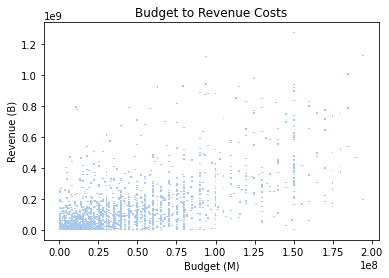

In [19]:
sns.histplot(df[(df.revenue<1000000)| # 1M
  (df.budget<200000000)], # 200M
             x = 'budget', y='revenue')

plt.xlabel("Budget (M)")
plt.ylabel("Revenue (B)")
plt.title("Budget to Revenue Costs")

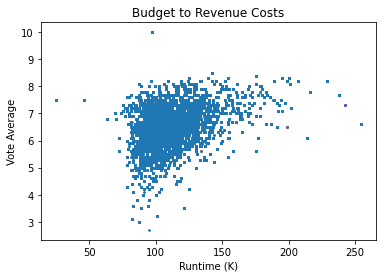

In [11]:
plt.scatter(
    df['runtime'], 
    df['vote_average'], 
    s=0.2
        )

plt.xlabel("Runtime (K)")
plt.ylabel("Vote Average")
plt.title("Budget to Revenue Costs")
# plt.savefig('BudgetvRevenue')
plt.show()

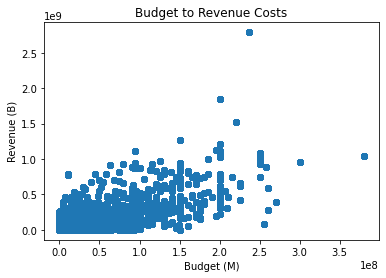

In [20]:
plt.scatter(
    df['budget'], 
    df['revenue']
#     s=0.2
        )

plt.xlabel("Budget (M)")
plt.ylabel("Revenue (B)")
plt.title("Budget to Revenue Costs")
plt.show()

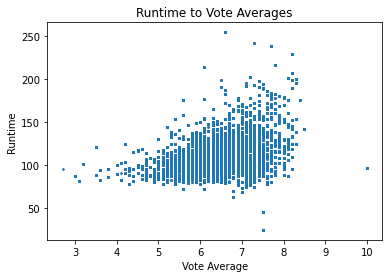

In [21]:
plt.scatter(
    df['vote_average'], 
    df['runtime'], 
    s=0.2
        )


plt.xlabel("Vote Average")
plt.ylabel("Runtime")
plt.title("Runtime to Vote Averages")
# plt.savefig('RuntimevScore')
plt.show()

In [22]:
# Identify outliers of budget to revenue
df[(df.revenue>1100000000)|
  (df.budget>2000000000)][['movieId',
                           'title',
                          'budget',
                          'revenue']].drop_duplicates()

,movieId,title,budget,revenue
1500647,1721,Titanic (1997),200000000.0,1.845034e+09
4746422,7153,Der Herr der Ringe - Die R√ºckkehr des K√∂nigs...,94000000.0,1.118889e+09
7482613,72998,Avatar - Aufbruch nach Pandora (2009),237000000.0,2.787965e+09
8064147,87520,Transformers 3 (2011),195000000.0,1.123747e+09
8132448,89745,Marvel's The Avengers (2012),220000000.0,1.519558e+09
8490448,96079,James Bond 007 - Skyfall (2012),200000000.0,1.108561e+09
8711437,102125,Iron Man 3 (2013),200000000.0,1.215440e+09
8867805,106696,Die Eisk√∂nigin - V√∂llig unverfroren (2013),150000000.0,1.274219e+09


# Classification

In [23]:
# Import LabelEncoder for converting categorical variables into numerical (dummy) variables
from sklearn import preprocessing as prep

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [24]:
s1 = df['keyword']
s2 = df['overview_keyword']

s1.update(s2[s2.notnull()])

s1 = df['overview_keyword']
s2 = df['keyword']

s1.update(s2[s2.notnull()])

In [28]:
df.columns

Index(['imdbId', 'movieId', 'tmdbId', 'keyword', 'tid', 'title', 'imdbRating',
       'duration', 'movieID', 'TMDB ID', 'overview_keyword', 'genre', 'budget',
       'original_language', 'popularity', 'release_date', 'revenue', 'runtime',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [41]:
df_class = df[[
    'movieId',
    'genre','keyword','tagline',
    'duration', 'runtime',  
    'budget','revenue',
    'imdbRating', 'vote_average', 'vote_count', 'popularity'
              ]]

df_class.imdbRating.replace(
    to_replace=r'[^0-9.]', 
    value=0,
    regex=True, inplace=True)
df_class['imdbRating']=df_class.imdbRating.astype('float')

df_class = df_class.dropna()
df_class.info(null_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8409490 entries, 4606 to 9004254
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   movieId       8409490 non-null  int64  
 1   genre         8409490 non-null  object 
 2   keyword       8409490 non-null  object 
 3   tagline       8409490 non-null  object 
 4   duration      8409490 non-null  object 
 5   runtime       8409490 non-null  float64
 6   budget        8409490 non-null  float64
 7   revenue       8409490 non-null  float64
 8   imdbRating    8409490 non-null  object 
 9   vote_average  8409490 non-null  float64
 10  vote_count    8409490 non-null  float64
 11  popularity    8409490 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 834.1+ MB


In [73]:
df_class['Important_Features'] = \
    df_class['Title']+" "+df_class['genre']+" "+ \
    df_class['Average Rating'].astype(str)+" "+ \
    df_class['Number of Ratings'].astype(str)

df_class.head(1)
df['Important_Features'] = df['Title']+" "+df['genre']+" "+df['Average Rating'].astype(str)+" "+df['Number of Ratings'].astype(str)
df.head(1)

ValueError: unknown type str32

In [61]:
#creating labelEncoder
le = prep.LabelEncoder()

# Converting categorical variables into numberic variables
df_class['genre']=le.fit_transform(df_class['genre'])
df_class['keyword']=le.fit_transform(df_class['keyword'])
df_class['tagline']=le.fit_transform(df_class['tagline'])
df_class['duration']=le.fit_transform(df_class['duration'])

In [65]:
X=df_class[['genre', 'keyword', 'tagline', 'duration', 'runtime',
       'budget', 'revenue', 'imdbRating', 'vote_average', 'vote_count',
       'popularity']]
X_labels = ['genre', 'keyword', 'tagline', 'duration', 'runtime',
       'budget', 'revenue', 'imdbRating', 'vote_average', 'vote_count',
       'popularity']
y=df_class['movieId']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [67]:
#Create Logistic Regression Classifier
lr = LogisticRegression()

#Train the LR model 
lr.fit(X_train, y_train)

#Predict the outcome for Test data
lr_y_pred = lr.predict(X_test)

MemoryError: Unable to allocate 105. GiB for an array with shape (5886643, 2391) and data type int64

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, lr_y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, lr_y_pred))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, lr_y_pred))